In [1]:
# define a function which display the image read by cv2 using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

def show_image(image = None, title = "", size = 10):
    if image is not None:
        height, width = image.shape[0], image.shape[1]
        aspect_ratio = width / height
        
        plt.figure(figsize=(size * aspect_ratio, size))
        rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        
        plt.imshow(rgb_image)
        plt.title(title)
        plt.show()
    else:
        print("Image is null")

### Perspective Transformation
- It is a process of transforming the object or image from one aspect ratio to another aspect ratio. or from 3D to 2D
- for ex. when human eyes see an object that object might be bigger, sccaled, rotated anything this is generally called as perspective, and transformation is nothing but transforming the object from one state to another.
- is basically, used where the object needs to be defined in a proper format, i.e it is not scaled, not tilted, etc etc.

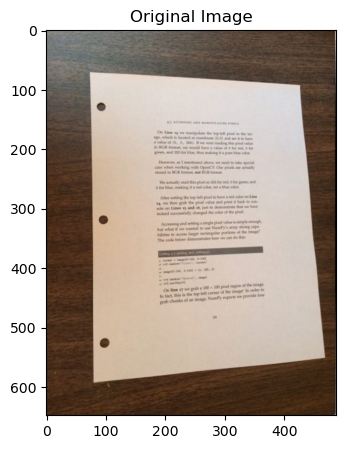

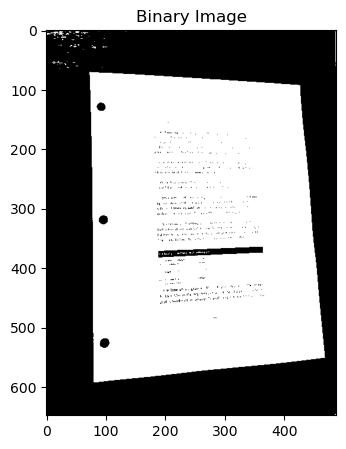

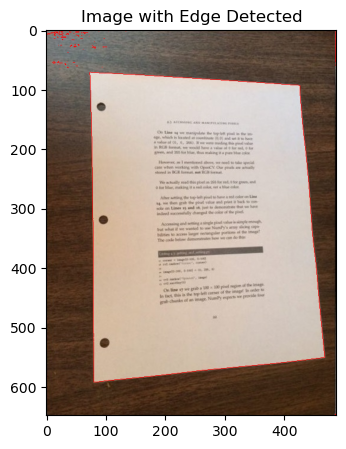

In [8]:
path = "images/Paper_image.jpg"
img = cv2.imread(path)
show_image(img, "Original Image", 5)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, thre_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show_image(thre_img, "Binary Image", 5)

contours, hierarchy = cv2.findContours(thre_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # because we only want to fetch the external edges no need to fetch internal edges
cv2.drawContours(img, contours, -1 , (0,0,255), 1)

show_image(img, "Image with Edge Detected", 5)


In [12]:
# now in the above image we can observe that there are some contours in the top left corder which will not goinig to help,
# aditionally, to transform the image we only need the corners points, hence let's fetch the corner point

 # sort the contours in the max to min order
sorted_contours = sorted(contours, key= cv2.contourArea, reverse= True)

# loop over each contours to find the the corner contours
for cnt in sorted_contours:
    
    # here i am finding the perimeter or curve length of contours points, True means the points are closed
    perimeter = cv2.arcLength(cnt, True)
    
    # let's approximate the corner contours by approximating the distance between two or more curves
    approx = cv2.approxPolyDP(cnt, 0.05 * perimeter, True)
    
    if len(approx) == 4:
        break;
        
print("Approximated 4 corner points are => \n" , approx)

Approximated 4 corner points are => 
 [[[ 74  70]]

 [[ 80 592]]

 [[468 551]]

 [[427  93]]]


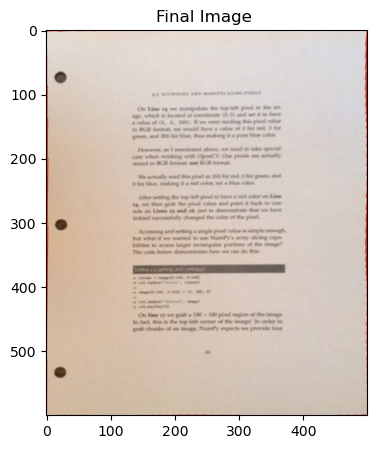

In [19]:
# as we have fetched the corner points let's perform perspective transformation to straight the paper
input_points = np.float32(approx)
# always sort the approx point into clockwise direction it's a good practise 

output_points = np.float32([[0,0], # top left
                       [0,600], # bottom left
                       [500,600], # bottom right
                       [500,0]]) # top right

perspective_matrix = cv2.getPerspectiveTransform(input_points, output_points)

final_img = cv2.warpPerspective(img, perspective_matrix, (500,600))

show_image(final_img, "Final Image ", 5)